<a href="https://colab.research.google.com/github/krishnadixit05/Google-Colab/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Lab - 9 Kmeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
#Loading the dataset
df1 = pd.read_excel("/content/kmean.xlsx", sheet_name="kmeans_data",header =None)
df1


,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


In [ ]:
df1.shape

(300, 2)

In [ ]:
df1.describe()

,0,1
count,300.000000,300.000000
mean,3.684376,2.987101
std,1.925578,1.685078
min,-0.245127,0.205810
25%,2.156202,1.210797
50%,3.231561,2.949738
75%,5.509490,4.807780
max,8.203398,5.784297


In [ ]:
#centroid of the clusters -> number of the clusters
#define numbers = 3

import random
init_centroid=random.sample(range(0,len(df1)),3)
init_centroid

[32, 166, 58]

In [ ]:
#identified our centroids to the clusters
centroids=[]
for i in init_centroid:
  centroids.append(df1.iloc[i])

In [ ]:
centroids

[0    2.069953
 1    4.684671
 Name: 32, dtype: float64,
 0    2.156534
 1    0.403589
 Name: 166, dtype: float64,
 0    2.241851
 1    4.924462
 Name: 58, dtype: float64]

In [ ]:
centroids = np.array(centroids)
centroids


array([[2.06995345, 4.6846713 ],
       [2.15653404, 0.40358861],
       [2.24185052, 4.9244617 ]])

In [ ]:
X = np.array(df1)


In [ ]:
def calc_distance(i,j):
  return(sum((i-j)**2))**0.5

In [ ]:
#for any given datapoint, find out the nearest centroid
def findnearestcentroid(centroids,X):
  assignedcluster=[]
  for i in X:
    dist=[]
    for j in centroids:
      dist.append(calc_distance(i, j))
    assignedcluster.append(np.argmin(dist))
  return assignedcluster

In [ ]:
get_centroid=findnearestcentroid(centroids,X)
get_centroid


[0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [ ]:
#getting the new centroid
def calculating_centroid(cluster_number,X):
  new_centroid=[]
  new_df=pd.concat([pd.DataFrame(X),pd.DataFrame(get_centroid,columns=['cluster'])],axis=1)
  for c in set(new_df['cluster']):   #c->0,1,2
    current_cluster=new_df[new_df['cluster']==c][new_df.columns[:-1]]
    cluster_mean=current_cluster.mean(axis=0)
    new_centroid.append(cluster_mean)
  return new_centroid

In [ ]:
#pd.concat([pd.DataFrame(X),pd.DataFrame(get_centroid,columns=['cluster'])],axis=1)

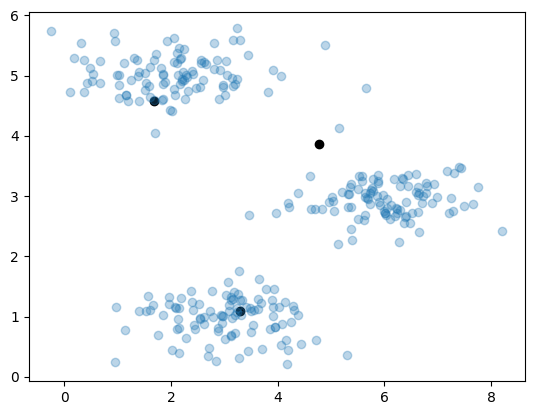

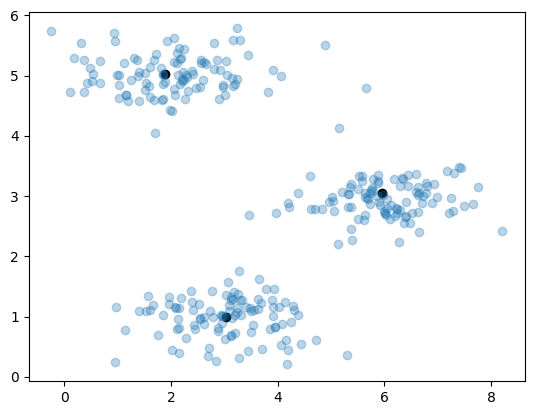

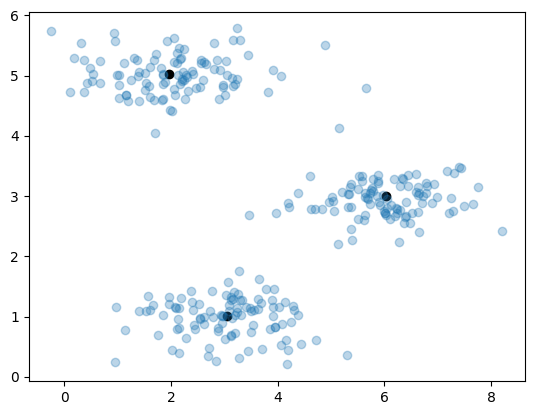

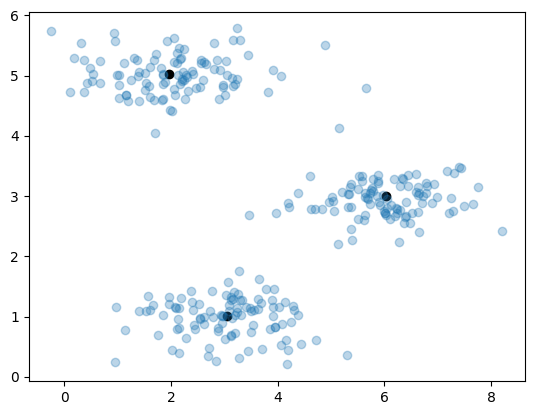

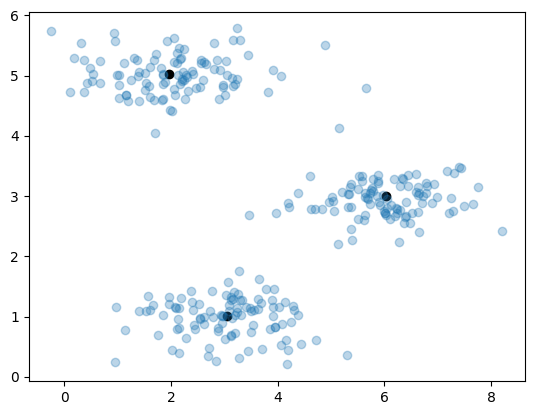

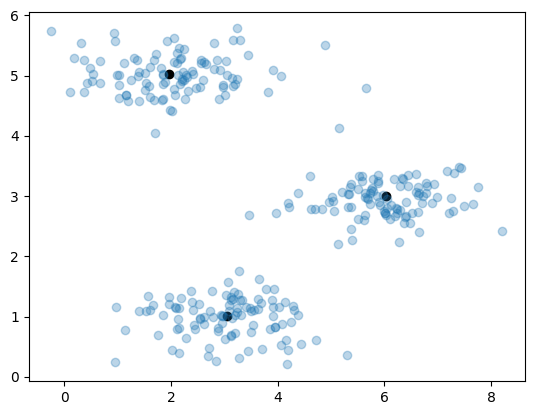

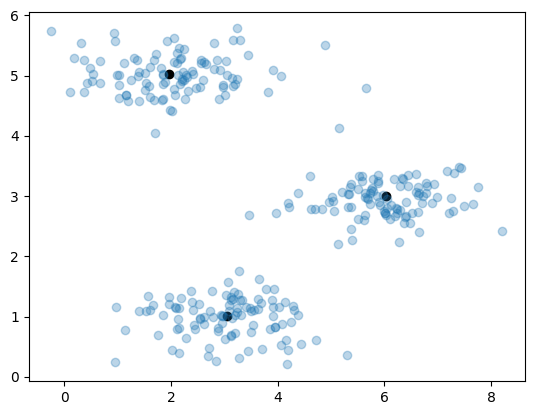

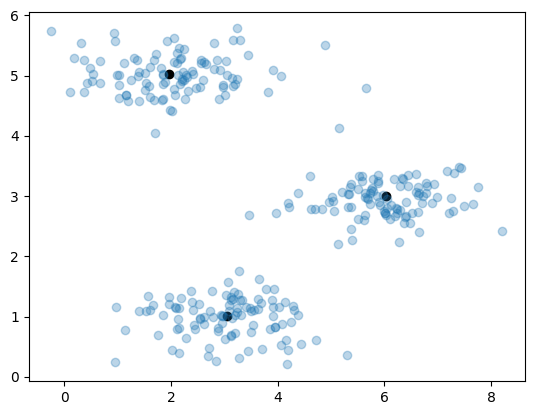

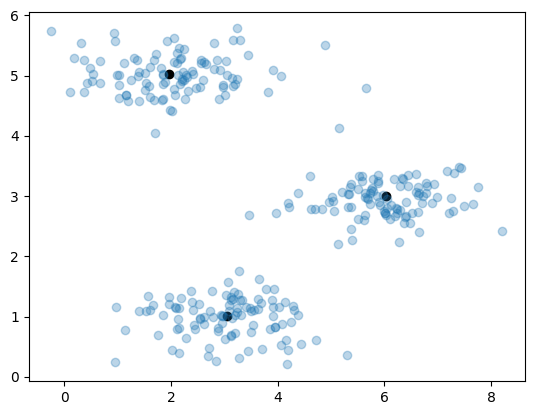

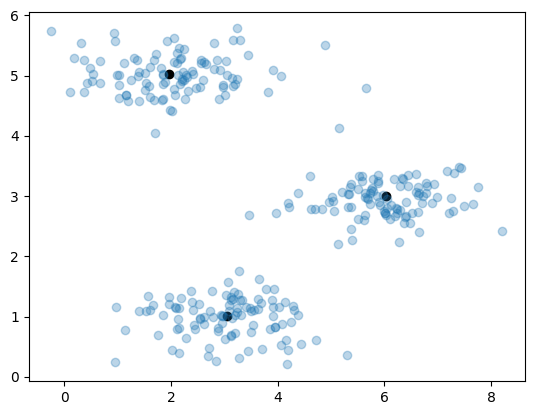

In [ ]:
epochs=10
for i in range(epochs):
  get_centroid=findnearestcentroid(centroids, X) #Fixed the typo in the function name
  centroids=calculating_centroid(get_centroid,X)
  plt.figure()
  plt.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],color='black')#plotting the centroid points
  plt.scatter(X[:,0],X[:,1],alpha=0.3) #plotting the observation points
  plt.show()

In [ ]:
print(np.array(centroids))

[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]
